In [23]:
#기본 라이브러리 import
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

#데이터 전처리(레이블링, 스케일링, train_test 쪼개기)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping

#모델 설정부분
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
#dataframe 불러오기
df = pd.read_csv('Avocado.csv')
df.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePrice
0,0,2015-12-27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1.33
1,1,2015-12-20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,1.35
2,2,2015-12-13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,0.93
3,3,2015-12-06,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1.08
4,4,2015-11-29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,1.28


In [3]:
#type열의 unique 값 확인
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [4]:
#확인 결과를 string to int 형식으로 매핑
mapping = {'conventional' : 0, 'organic' : 1}
x = df.type.map(mapping)

#매핑 후 저장
df.insert(9, 'type_label', x)
df.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type_label,XLarge Bags,type,year,region,AveragePrice
0,0,2015-12-27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,0.0,conventional,2015,Albany,1.33
1,1,2015-12-20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,0.0,conventional,2015,Albany,1.35
2,2,2015-12-13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,0.0,conventional,2015,Albany,0.93
3,3,2015-12-06,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,0.0,conventional,2015,Albany,1.08
4,4,2015-11-29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,0.0,conventional,2015,Albany,1.28


In [5]:
df.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type_label,XLarge Bags,type,year,region,AveragePrice
0,0,2015-12-27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,0.0,conventional,2015,Albany,1.33
1,1,2015-12-20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,0.0,conventional,2015,Albany,1.35
2,2,2015-12-13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,0.0,conventional,2015,Albany,0.93
3,3,2015-12-06,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,0.0,conventional,2015,Albany,1.08
4,4,2015-11-29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,0.0,conventional,2015,Albany,1.28


In [6]:
#필요 없는 칼럼 삭제
df = df.drop(df.columns[0], axis=1)
df = df.drop(['Date', 'type', 'region'], axis=1)
df.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type_label,XLarge Bags,year,AveragePrice
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,0.0,2015,1.33
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,0.0,2015,1.35
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,0.0,2015,0.93
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,0.0,2015,1.08
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,0.0,2015,1.28


In [25]:
MODEL_SAVE_FOLDER_PATH = './model/'

if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
  os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + 'mnist-' + '{epoch:02d}-{val_loss:.4f}.hdf5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                verbose=1, save_best_only=True)

cb_early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [7]:
#랜덤 테이블 시드값 부여
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [8]:
#변수, 결과 분할
dataset = df.values
X = dataset[:,0:10].astype(np.float32)
Y = dataset[:,10]

In [9]:
# 데이터 스케일링
# 변형 객체 생성
minmax_scaler = MinMaxScaler()
# 훈련데이터의 모수 분포 저장
minmax_scaler.fit(X)
# 훈련 데이터 스케일링
X = minmax_scaler.transform(X)
# 테스트 데이터의 스케일링

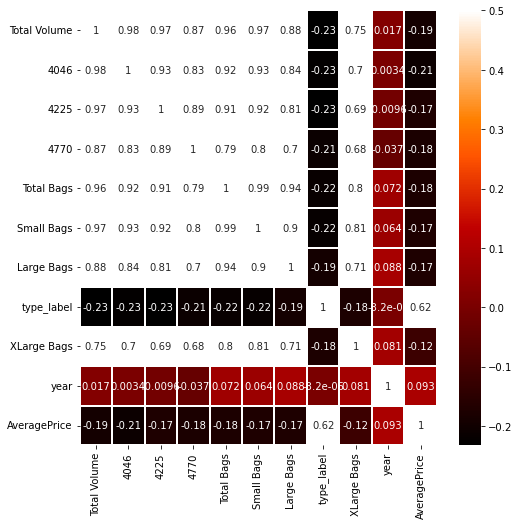

In [21]:
#히트맵 확인(가격은 type_label과 큰 상관관계가 있다)
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

In [11]:
# 7대 3으로 학습, 테스트셋 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = seed)

In [12]:
# Sequential 모델 설정 후, 은닉층과 출력층 추가
model = Sequential()
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [17]:
#optimizer로 adam 추가, loss는 'mean_squared_error'
model.compile(loss='mean_squared_error',
         optimizer='adam')

In [26]:
#train셋에 모델 적용
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300
                   ,verbose=0, callbacks=[cb_checkpoint, cb_early_stopping])


Epoch 00001: val_loss improved from inf to 0.07046, saving model to ./model/mnist-01-0.0705.hdf5

Epoch 00002: val_loss did not improve from 0.07046

Epoch 00003: val_loss did not improve from 0.07046

Epoch 00004: val_loss did not improve from 0.07046

Epoch 00005: val_loss did not improve from 0.07046

Epoch 00006: val_loss did not improve from 0.07046

Epoch 00007: val_loss did not improve from 0.07046

Epoch 00008: val_loss did not improve from 0.07046

Epoch 00009: val_loss did not improve from 0.07046

Epoch 00010: val_loss improved from 0.07046 to 0.07045, saving model to ./model/mnist-10-0.0704.hdf5

Epoch 00011: val_loss did not improve from 0.07045

Epoch 00012: val_loss did not improve from 0.07045

Epoch 00013: val_loss did not improve from 0.07045

Epoch 00014: val_loss did not improve from 0.07045

Epoch 00015: val_loss did not improve from 0.07045

Epoch 00016: val_loss did not improve from 0.07045

Epoch 00017: val_loss improved from 0.07045 to 0.07032, saving model to

In [27]:
#실제값, 예측값 비교
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격 : {:.3f}, 예상가격: {:.3f}".format(label, prediction))

실제가격 : 1.480, 예상가격: 1.636
실제가격 : 1.050, 예상가격: 1.164
실제가격 : 1.270, 예상가격: 1.256
실제가격 : 2.150, 예상가격: 1.632
실제가격 : 1.930, 예상가격: 1.609
실제가격 : 1.820, 예상가격: 1.754
실제가격 : 2.060, 예상가격: 1.699
실제가격 : 1.700, 예상가격: 1.711
실제가격 : 1.650, 예상가격: 1.806
실제가격 : 1.410, 예상가격: 1.157


In [28]:
#손실율 메트릭스
loss_metrics = model.evaluate(X_test, Y_test)
print('loss_metrics :', loss_metrics)

5475/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

loss_metrics : 0.07013229943777873


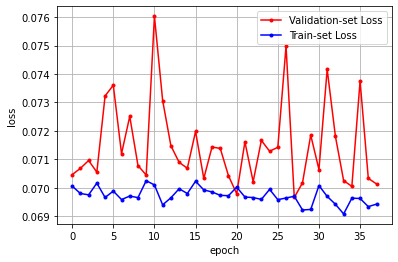

In [30]:
#검증 결과 값이 튀긴하지만, loss가 줄어들고는 있음
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
#결과 : loss가 적음
#이걸 바탕으로 더 발전시켜도 됩니당(그래프 그리기 등)
#Dense조정한 다른 모델 만들어서 loss 비교하면 될듯(엑셀 표 차트 그리기)